In [4]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
from pandas_datareader import data as wb
from pandas import Series, DataFrame

In [5]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key = '88CPK7BNFO69DPDI', output_format = 'pandas')

In [6]:
INTC = ts.get_daily_adjusted('INTC', outputsize = 'full')

In [7]:
type(INTC)                #Can't work with tuples/alpha vantage -> Use IEX to import financial data

tuple

In [8]:
INTC2 = wb.DataReader('INTC', data_source = 'iex', start = '2014-05-21')['close']

5y


In [9]:
INTC2.head()

date
2014-05-29    23.4281
2014-05-30    23.7409
2014-06-02    23.6888
2014-06-03    24.0364
2014-06-04    23.9842
Name: close, dtype: float64

In [10]:
INTC2.tail()

date
2019-05-21    44.46
2019-05-22    44.00
2019-05-23    44.53
2019-05-24    44.57
2019-05-28    43.57
Name: close, dtype: float64

In [11]:
type(INTC2)

pandas.core.series.Series

In [12]:
INTC2.head()

date
2014-05-29    23.4281
2014-05-30    23.7409
2014-06-02    23.6888
2014-06-03    24.0364
2014-06-04    23.9842
Name: close, dtype: float64

In [13]:
#Simple Rate of Return                     (Optimal with multiple securities)
INTCsr = (INTC2/INTC2.shift(1)) - 1         #Formula = (P1 - P0)-1

In [14]:
(INTCsr.head())*100

date
2014-05-29         NaN
2014-05-30    1.335149
2014-06-02   -0.219453
2014-06-03    1.467360
2014-06-04   -0.217171
Name: close, dtype: float64

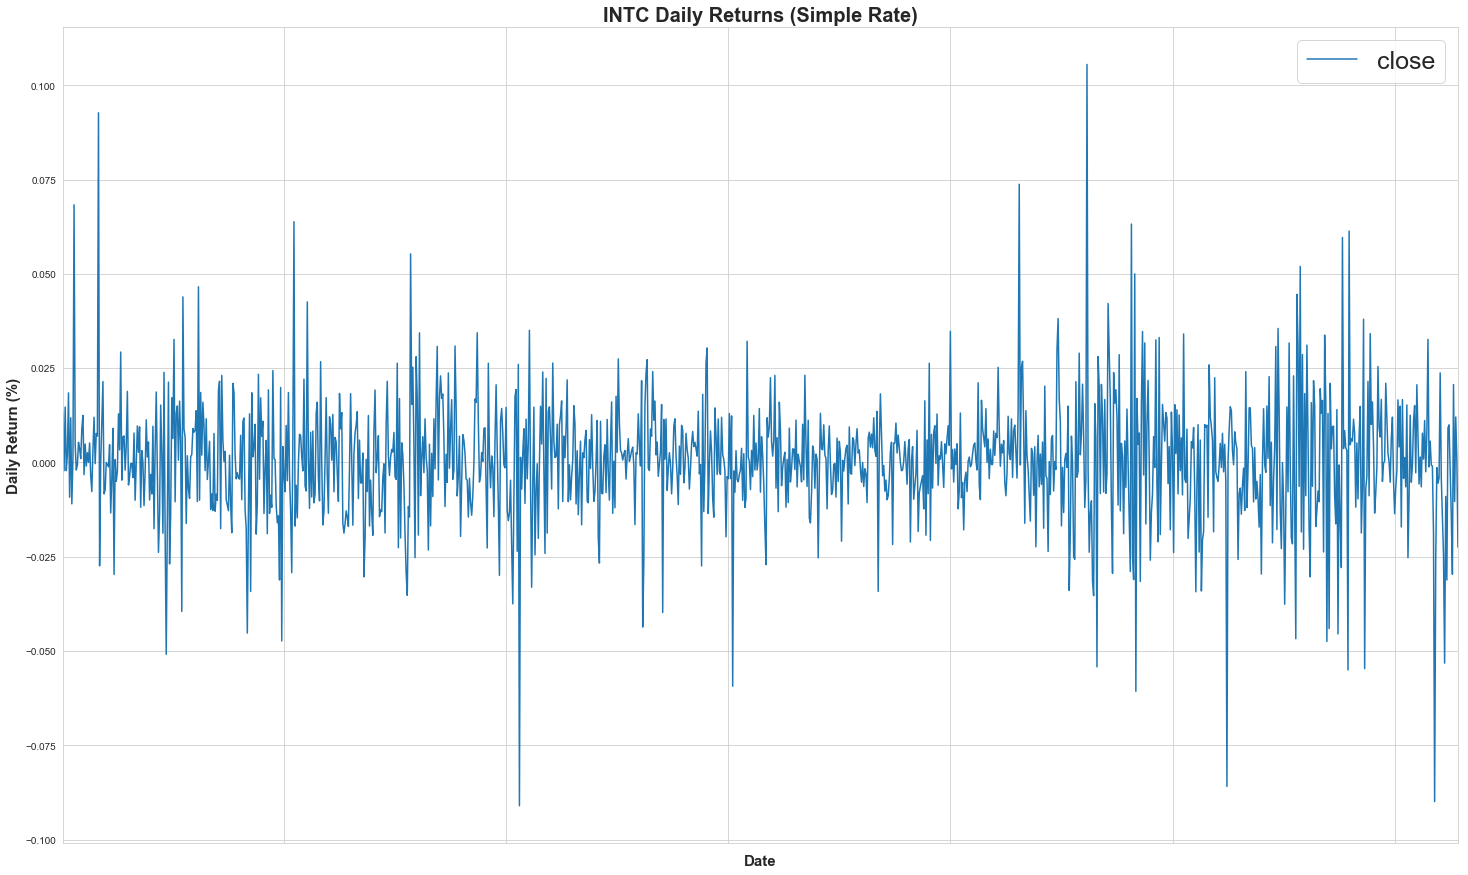

In [59]:
INTCsr.plot(legend = True, figsize = (25,15))
plt.title('INTC Daily Returns (Simple Rate)', fontsize = 20, weight = 'bold')
plt.legend(prop={'size': 25})
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

In [16]:
avg_returns = INTCsr.mean()*250          #Usually 250 trading days in a given year
x = (avg_returns)*100
x

15.649536681992911

In [17]:
print(str(round(x, 2)) + '%')

15.65%


In [18]:
#Logarithmic Return                        (Optimal with only one security)
INTClr = np.log(INTC2/INTC2.shift(1))      #Formula = log(P1 - P0)
(INTClr.head())*100

date
2014-05-29         NaN
2014-05-30    1.326314
2014-06-02   -0.219694
2014-06-03    1.456699
2014-06-04   -0.217407
Name: close, dtype: float64

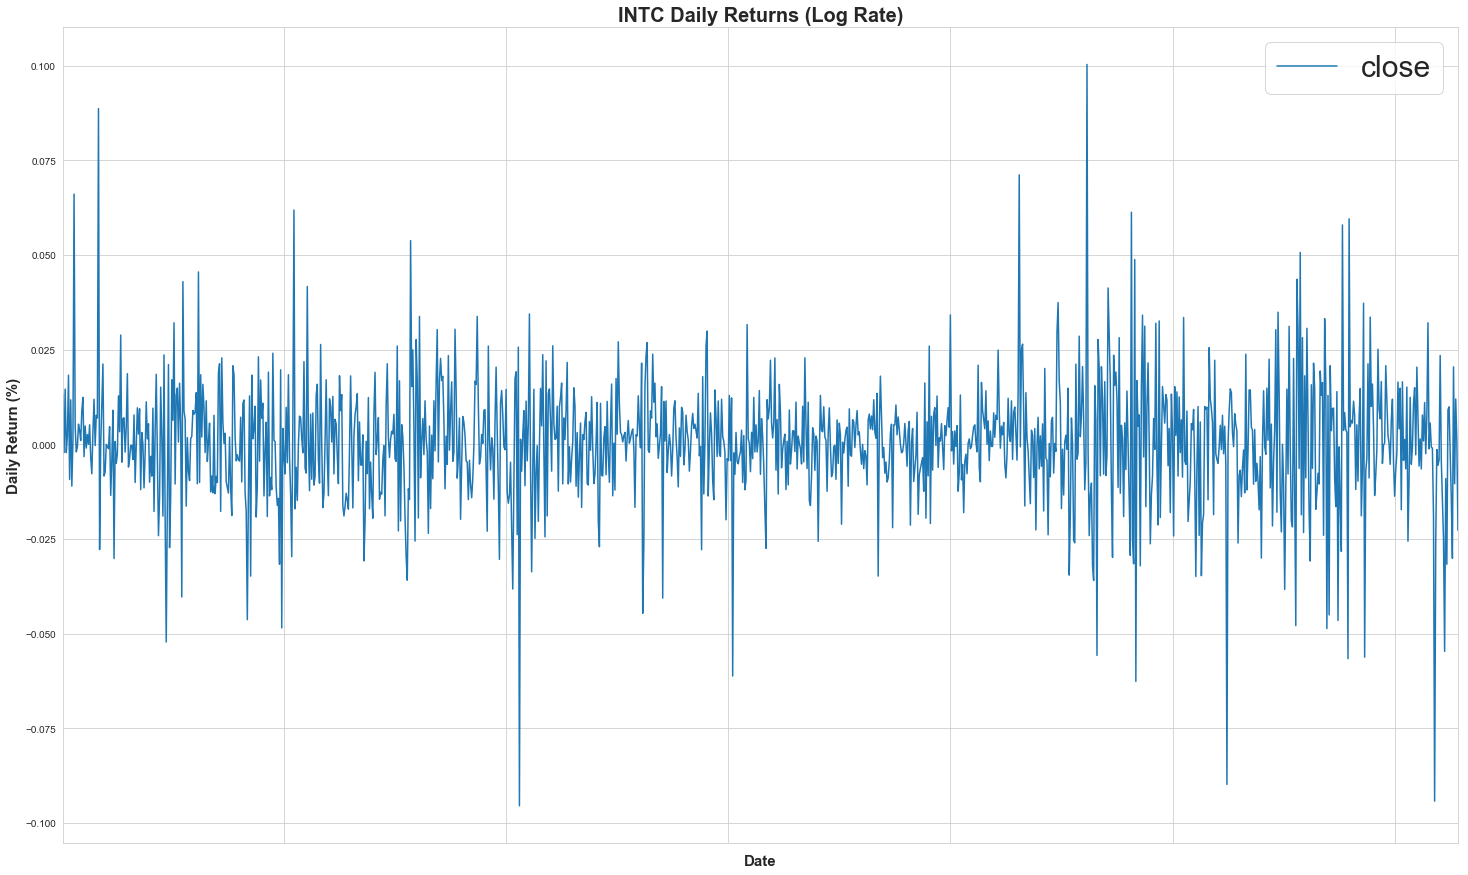

In [58]:
INTClr.plot(legend = True, figsize = (25,15))
plt.title('INTC Daily Returns (Log Rate)', fontsize = 20, weight = 'bold')
plt.legend(prop={'size': 30})
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

In [20]:
avg_lreturn = INTClr.mean()*250
y = (avg_lreturn)*100
y

12.33955217808539

In [21]:
print(str(round(y, 2)) + '%')

12.34%


In [22]:
#Calculating Portfolio Return
tickers = ['INTC', 'NVDA', 'AMD', 'QCOM']
data = pd.DataFrame()
for s in tickers:
    data[s] = wb.DataReader(s, data_source = 'iex', start = '2014-05-21')['close']

5y
5y
5y
5y


In [23]:
data.info()                           #Data appears to be clean - Same number of entries

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-05-29 to 2019-05-28
Data columns (total 4 columns):
INTC    1258 non-null float64
NVDA    1258 non-null float64
AMD     1258 non-null float64
QCOM    1258 non-null float64
dtypes: float64(4)
memory usage: 49.1+ KB


In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.head()

,INTC,NVDA,AMD,QCOM
date,,,,
2014-05-29,23.4281,18.1649,4.03,67.5494
2014-05-30,23.7409,18.2128,4.00,67.7684
2014-06-02,23.6888,18.1553,3.97,68.1495
2014-06-03,24.0364,18.0786,3.94,68.0817
2014-06-04,23.9842,18.0978,4.04,67.6753


In [26]:
data.tail()

,INTC,NVDA,AMD,QCOM
date,,,,
2019-05-21,44.46,155.06,27.35,77.750
2019-05-22,44.00,152.20,27.41,69.310
2019-05-23,44.53,147.32,26.36,68.255
2019-05-24,44.57,145.15,26.44,66.210
2019-05-28,43.57,143.33,29.03,65.370


In [27]:
data.iloc[0]                       #Two methods for obtaining the initial values
#data.loc['2014-05-21']

INTC    23.4281
NVDA    18.1649
AMD      4.0300
QCOM    67.5494
Name: 2014-05-29, dtype: float64

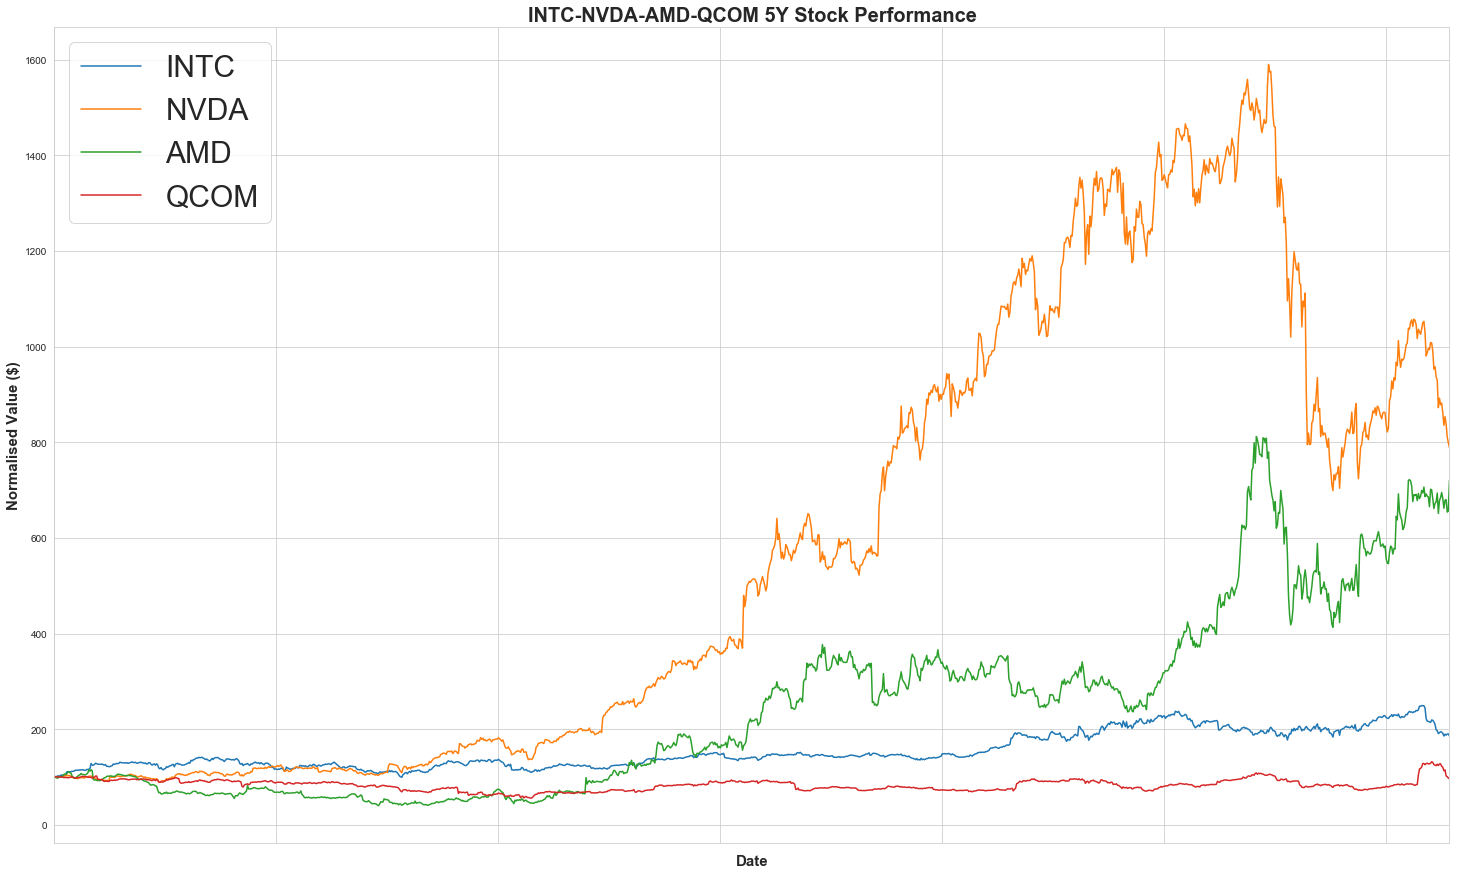

In [49]:
(data/data.iloc[0]*100).plot(legend = True, figsize = (25,15))     #'*100' normalises the stock prices
plt.title('INTC-NVDA-AMD-QCOM 5Y Stock Performance', fontsize = 20, weight = 'bold')
plt.legend(prop={'size': 30})
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Normalised Value ($)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

In [31]:
returns = (data/data.shift(1))-1
(returns.head())*100

,INTC,NVDA,AMD,QCOM
date,,,,
2014-05-29,NaN,NaN,NaN,NaN
2014-05-30,1.335149,0.263695,-0.744417,0.324207
2014-06-02,-0.219453,-0.315712,-0.750000,0.562356
2014-06-03,1.467360,-0.422466,-0.755668,-0.099487
2014-06-04,-0.217171,0.106203,2.538071,-0.596930


In [32]:
weights = np.array([0.25,0.25,0.25,0.25])

In [33]:
annualR = returns.mean()*250
ar = (annualR)*100
ar

INTC    15.649537
NVDA    49.632635
AMD     58.786153
QCOM     4.066358
dtype: float64

In [34]:
np.dot(ar,weights)                            #Dot product - Return * Portfolio Weights = Portfolio Return

32.03367069811398

In [35]:
pr = np.dot(ar, weights)
value = round(pr, 2)
value

32.03

In [36]:
weights2 = np.array([0.5,0.2,0.1,0.2])

In [37]:
np.dot(ar, weights2)

24.4431822303251

In [38]:
pr2 = np.dot(ar, weights2)
value2 = round(pr2, 2)
value2

24.44

In [39]:
#Indices Rate of Return                      (Actual indices not supported with IEX -> Use tracking ETFs like SPY, DIA)
tickers2 = ['SPY', 'DIA']
data2 = pd.DataFrame()
for t in tickers2:
        data2[t] = wb.DataReader(t, data_source = 'iex', start = '2014-05-21')['close']

5y
5y


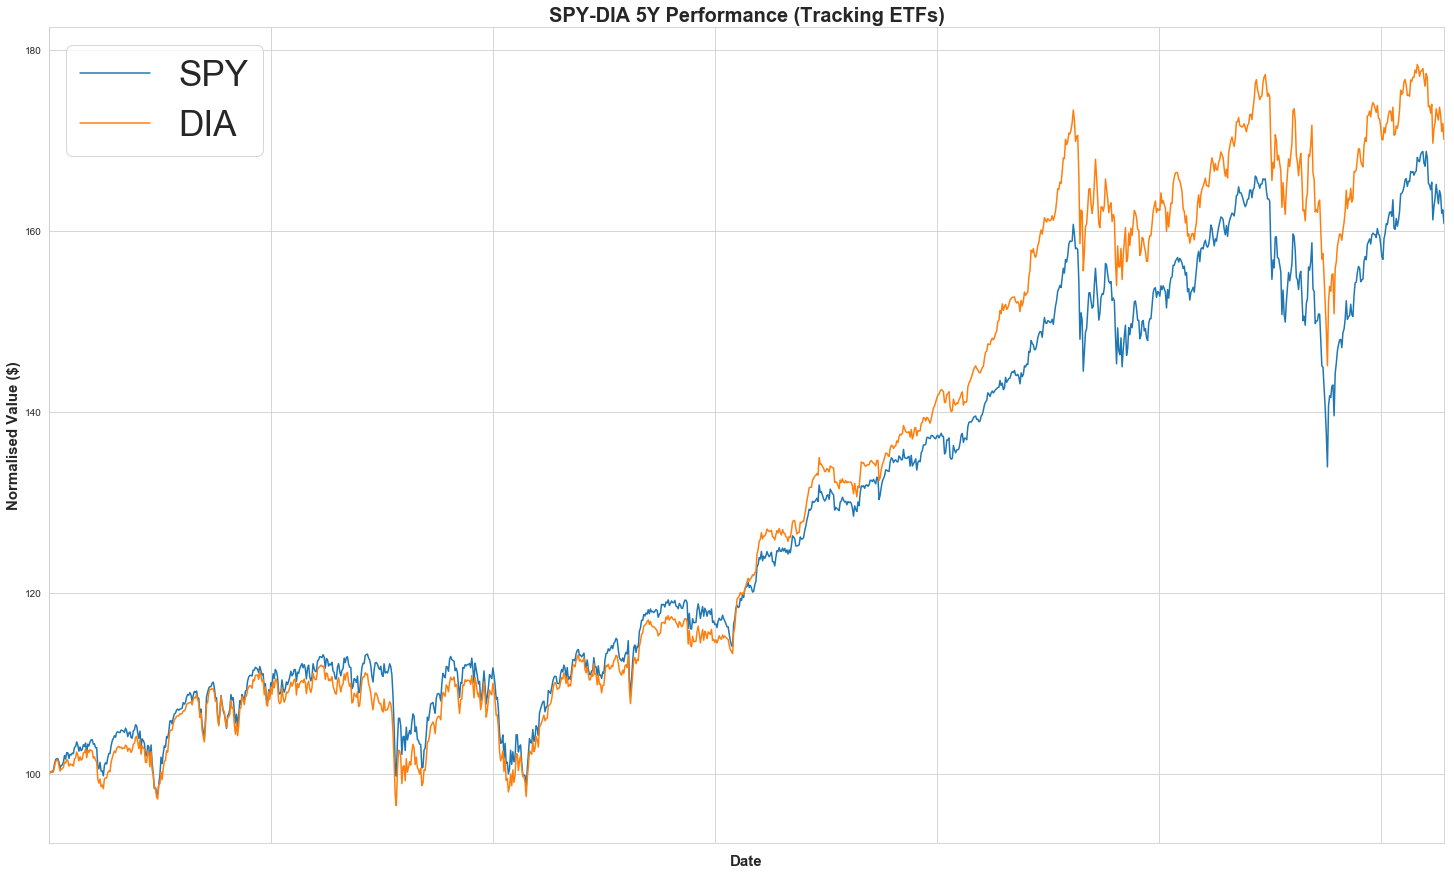

In [45]:
(data2/data2.iloc[0]*100).plot(figsize = (25,15), legend = 'True')     #'*100' normalises the stock prices
plt.legend(prop={'size': 35})
plt.title('SPY-DIA 5Y Performance (Tracking ETFs)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Normalised Value ($)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
plt.show()

In [46]:
indexr = (data2/data2.shift(1))-1

In [47]:
indexr.mean()*250

SPY    0.103269
DIA    0.114538
dtype: float64